### Arahan Assignment
0. Gunakan dataset student score
1. Lakukan proses Exploratory data analysis
2. Lakukan feature engineering :
- Check Duplicated Data
- Check Missing Value Handling
- Outlier Analysis
3. Lakukan modelling machine learning regression : gunakan minimal 2 model (linear regression, decision tree regressor, atau random forest regressor)
4. Lakukan evaluasi model
5. Berikan kesimpulan model mana yang terbaik performanya

In [ ]:
# Import libraries and resources
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# **0. Import dataset student score**

In [ ]:
dataset = pd.read_csv('student_scores.csv')
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# **1. Exploratory Data Analysis**

In [ ]:
# Provides some information regarding the columns in the data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [ ]:
# this describes the basic stat behind the dataset used
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1200x600 with 0 Axes>

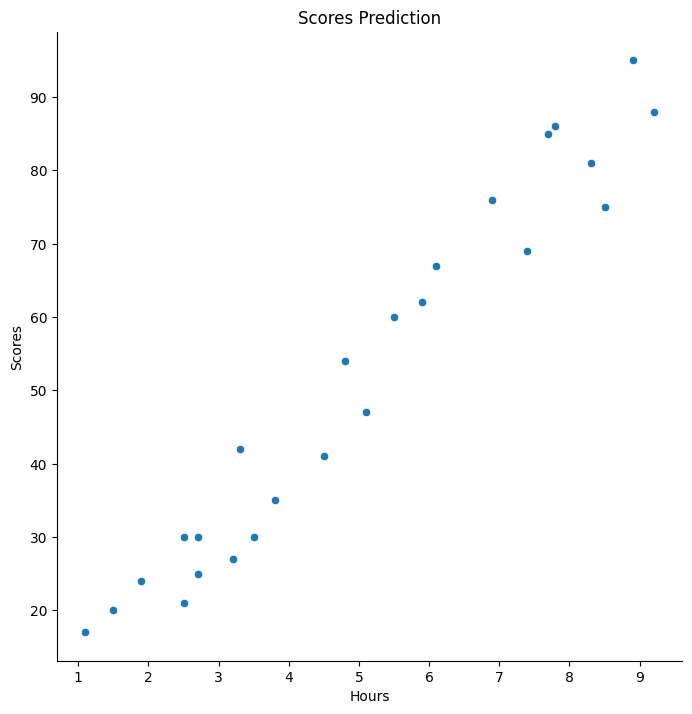

In [ ]:
# These Plots help to explain the values and how they are scattered

plt.figure(figsize=(12,6))
sns.pairplot(dataset,x_vars=['Hours'],y_vars=['Scores'],size=7,kind='scatter')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Scores Prediction')
plt.show()

# **2.  Feature Engineering**
*   Check Duplicated Data
*   Check Missing Value Handling
*   Outlier Analysis








In [ ]:
df = dataset.copy()

In [ ]:
#Check Duplicated Data
print("Data Sebelum Pemeriksaan Duplikat:")
print(df.shape)

Data Sebelum Pemeriksaan Duplikat:
(25, 2)


In [ ]:
duplicate_rows_before = df[df.duplicated()]
duplicate_rows_before

,Hours,Scores


In [ ]:
df = df.drop_duplicates()

In [ ]:
print("\nData Setelah Pemeriksaan Duplikat:")
print(df.shape)


Data Setelah Pemeriksaan Duplikat:
(25, 2)


In [ ]:
#Check missing value
df.isna().sum()

,0
Hours,0
Scores,0


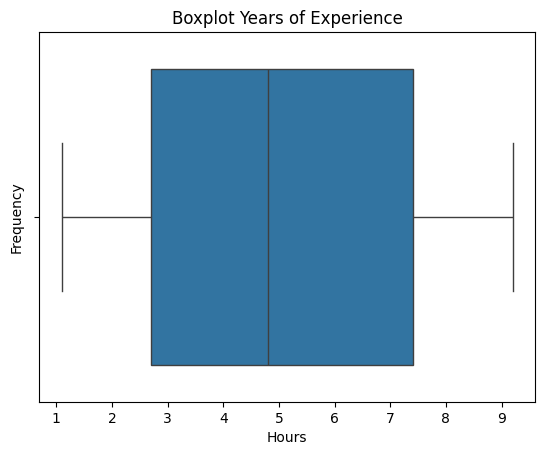

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Outlier Analysis
sns.boxplot(x="Hours", data=df)

# Menambahkan label sumbu dan judul
plt.xlabel("Hours")
plt.ylabel("Frequency")
plt.title("Boxplot Years of Experience")

# Menampilkan plot
plt.show()

There's no outlier value
There are no problems in investigate Feature Engineering

# **3. Modelling Machine Learning Regression**
gunakan minimal 2 model (linear regression, decision tree regressor, atau random forest regressor)
  # **4. Evaluasi Model**


In [ ]:
# Splitting the data (Hours)
X = df['Hours']
X.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [ ]:
# Splitting the data (Scores)
y = df['Scores']
y.head()

,Scores
0,21
1,47
2,27
3,75
4,30


In [ ]:
# Import machine learning data from scikit learn
from sklearn.model_selection import train_test_split

In [ ]:
# Split the data for train and test
# train : test = 75 : 25 atau 80 : 20 atau 70:30 atau 85:15 , size train > test
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.85,random_state=42)

# view data
# X_train
# X_test

# Linear Regression

In [ ]:
# Importing Linear Regression model from scikit learn
from sklearn.linear_model import LinearRegression

In [ ]:
# Create new axis for x column in array
import numpy as np
# Convert X_train and X_test to NumPy arrays
X_train = X_train.to_numpy() # Kolom x nya ada 1 saja, jika lebih dari 1 untuk x nya maka tidak code to_numpy() dibiarkan dalam bentuk dataframe
X_test = X_test.to_numpy()

# Add new axis to the end
X_train = X_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]

In [ ]:
#array
X_train

array([[5.9],
       [2.7],
       [3.3],
       [5.1],
       [3.8],
       [1.5],
       [3.2],
       [4.5],
       [8.9],
       [8.5],
       [3.5],
       [2.7],
       [1.9],
       [4.8],
       [6.1],
       [7.8],
       [5.5],
       [7.7],
       [1.1],
       [7.4],
       [9.2]])

In [ ]:
#array
X_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9]])

In [ ]:
y_train

,Scores
11,62
9,25
13,42
1,47
22,35
5,20
2,27
12,41
15,95
3,75


In [ ]:
y_test

,Scores
8,81
16,30
0,21
23,76


In [ ]:
# Fitting the model using Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred_train = lr_model.predict(X_train)
y_pred_train

array([60.06174668, 29.0325245 , 34.85050366, 52.30444114, 39.69881963,
       17.39656619, 33.88084047, 46.48646198, 89.15164247, 85.2729897 ,
       36.78983005, 29.0325245 , 21.27521896, 49.39545156, 62.00107307,
       78.48534735, 56.18309391, 77.51568416, 13.51791341, 74.60669458,
       92.06063205])

In [ ]:
y_train

,Scores
11,62
9,25
13,42
1,47
22,35
5,20
2,27
12,41
15,95
3,75


In [ ]:
# Predicting the Scores for the Test values
y_pred = lr_model.predict(X_test)

In [ ]:
X_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9]])

In [ ]:
y_pred

array([83.33366331, 27.09319812, 27.09319812, 69.75837861])

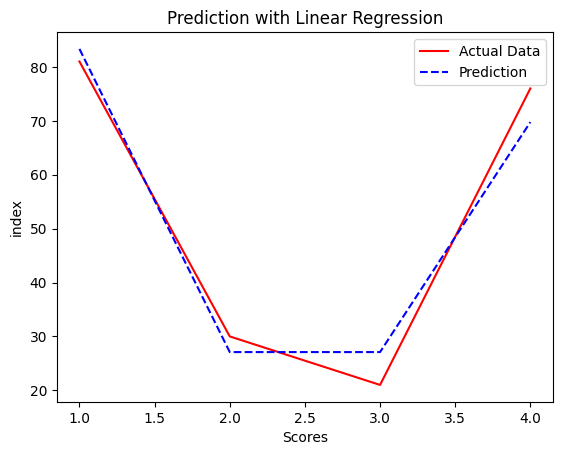

In [ ]:
# Plotting the actual and predicted values

c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-',label='Actual Data')
plt.plot(c,y_pred,color='b',linestyle='dashed',label='Prediction')
plt.xlabel('Scores')
plt.ylabel('index')
plt.title('Prediction with Linear Regression')
plt.legend()
plt.show()

In [ ]:
# Importing metrics for the evaluation of the model
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
# Calculate R square vale
rsq = r2_score(y_test,y_pred)

In [ ]:
print('r square Linear Regression:',rsq)

r square Linear Regression: 0.9685603135908576


In [ ]:
# Intecept and coeff of the line
print('Intercept of the Linear Regression model:',lr_model.intercept_)
print('Coefficient of the line Linear Regression:',lr_model.coef_)

Intercept of the Linear Regression model: 2.826892353899737
Coefficient of the line Linear Regression: [9.68207815]


In [ ]:
# x_test = 8.0
# y = 2.48 + 9.71 * 8.0

nilai_y = 2.48 + 9.71 * 8.0
print('nilai y : ', nilai_y )

nilai y :  80.16000000000001


Then it is said to form a line with result in Linear Regression

# y = 2.48 + 9.71 x

with x is the value of study hours

# Decision Tree Regressor

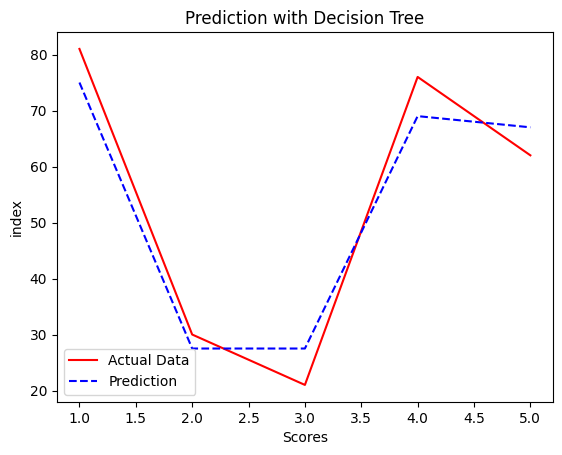

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

# Predicting the Salary for the Test values
y_pred_dt = dt_model.predict(X_test)

# View data
# y_pred_dt
# y_test
# X_test

# Plotting the actual and predicted values
c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-',label='Actual Data')
plt.plot(c,y_pred_dt,color='b',linestyle='dashed',label='Prediction')
plt.xlabel('Scores')
plt.ylabel('index')
plt.title('Prediction with Decision Tree')
plt.legend()
plt.show()

In [ ]:
# Calculate R square vale
rsq_dt = r2_score(y_test,y_pred_dt)

print('r square Decision Tree Results:',rsq_dt)

r square Decision Tree Results: 0.9461250849762066


# Random Forest

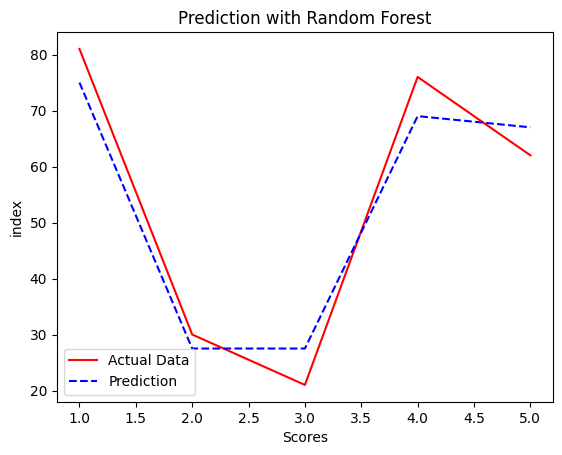

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

# View data
# y_pred_rf
# y_test
# X_test

# Plotting the actual and predicted values
c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-',label='Actual Data')
plt.plot(c,y_pred_dt,color='b',linestyle='dashed',label='Prediction')
plt.xlabel('Scores')
plt.ylabel('index')
plt.title('Prediction with Random Forest')
plt.legend()
plt.show()

In [ ]:
# Calculate R square vale
rsq_rf = r2_score(y_test,y_pred_rf)

print('r square Random Forest Results:',rsq_rf)

r square Random Forest Results: 0.9806856560163154


# **5. Kesimpulan**

Split data sangat memengaruhi hasil prediksi
--- semakin besar pembagian data train, maka mesakin tinggi akurasi prediksi.

Split Data 75:25
```
LR = 0.955
DT = 0.880
RF = 0.937
```

Split Data 80:20
```
LR = 0.967
DT = 0.946
RF = 0.978
```

Split Data 85:15
```
LR = 0.968
DT = 0.953
RF = 0.976
```

# Berdasarkan hasil penelitian, model **Linear Regression memiliki performa terbaik** dengan **akurasi tertinggi sebesar 0.968**, dibandingkan dengan model Decision Tree dan Random Forest.


